In [1]:
%matplotlib notebook

 Observations and Insights

In [2]:
 # Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

# Study data files
mouse_metadata_path = "/Users/matthewvicario/MatPlotLib/MatPlotLib-Challenge/meta_data.csv"
study_results_path = "/Users/matthewvicario/MatPlotLib/MatPlotLib-Challenge/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice
mice_count = combined_mouse_data["Mouse ID"].nunique()
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mouse_data = pd.DataFrame(combined_mouse_data.drop_duplicates(["Mouse ID", "Timepoint"]))
new_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
mice_count

249

 Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
new_mouse_sorted = new_mouse_data.sort_values(["Tumor Volume (mm3)"], ascending=True)

volume_mean = new_mouse_sorted.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
volume_median = new_mouse_sorted.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
volume_std = new_mouse_sorted.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
volume_var = new_mouse_sorted.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
volume_sem = new_mouse_sorted.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

regimen_stats_df = pd.DataFrame({"Volume Mean" : volume_mean,
                                   "Volume Median" : volume_median,
                                   "Volume Std Dev": volume_std,
                                   "Volume Variance": volume_var,
                                   "Volume SEM": volume_sem})
regimen_stats_df


,Volume Mean,Volume Median,Volume Std Dev,Volume Variance,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


Bar and Pie Charts

<IPython.core.display.Javascript object>


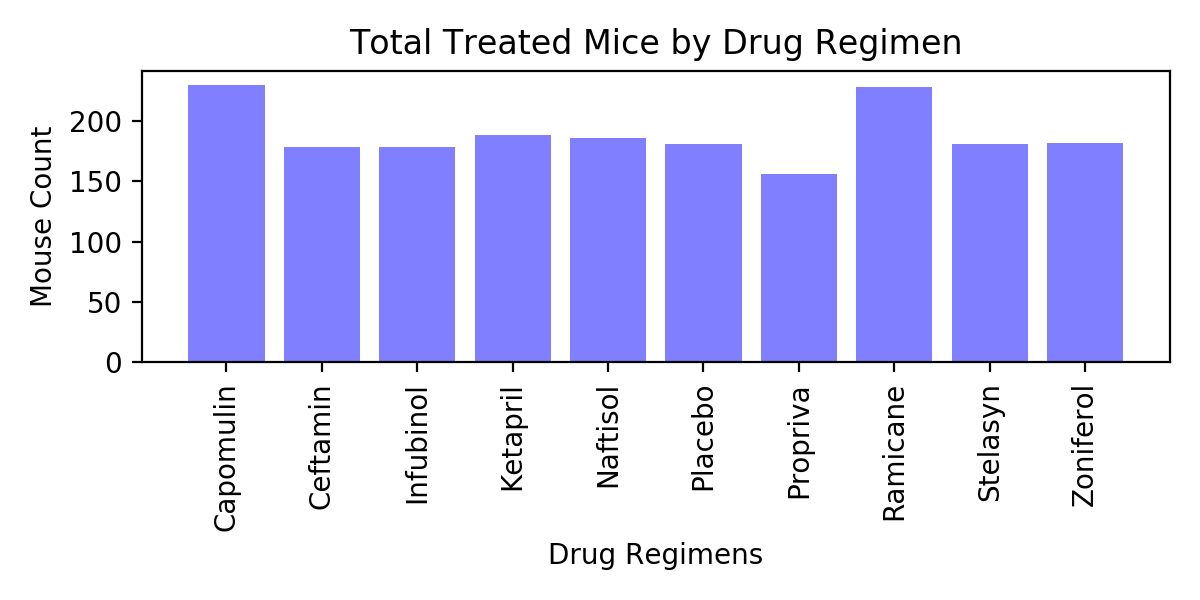

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
# the course of the study using pandas & pyplot 

regimens = regimen_stats_df.index.tolist()
#regimens
mouse_count = (new_mouse_sorted.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()).tolist()
#mouse_count
x_axis = np.arange(len(mouse_count))
x_axis = regimens

plt.figure(figsize=(6,3))
plt.bar(x_axis, mouse_count, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = "vertical")

plt.title("Total Treated Mice by Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Mouse Count")

plt.show()
plt.tight_layout()

In [8]:
plt.clf()
plt.cla()
plt.close()

<IPython.core.display.Javascript object>


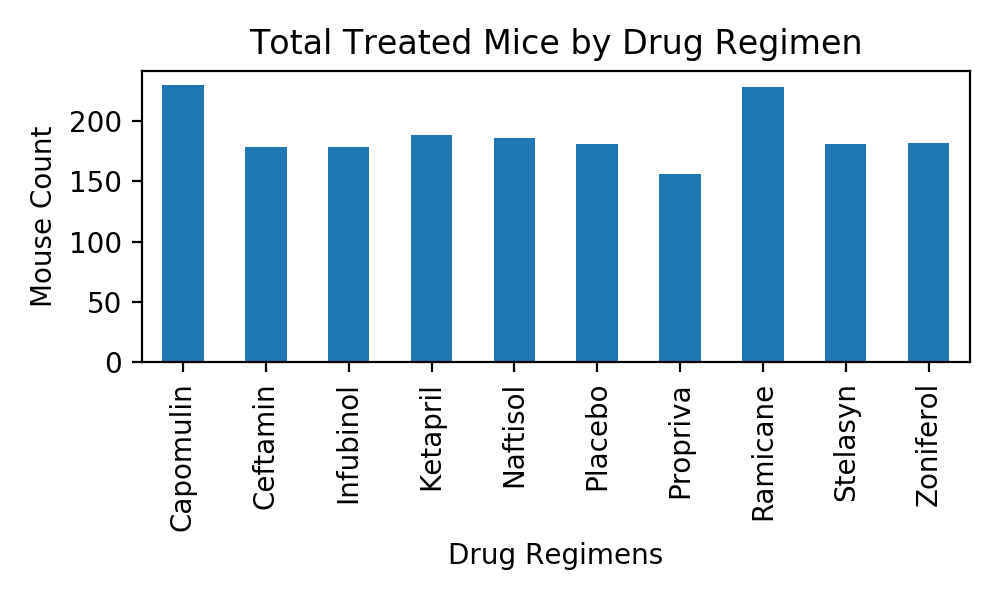

In [9]:
pandas_mouse_count = new_mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_count_df = pd.DataFrame(pandas_mouse_count)

regimen_count_df.plot(kind='bar',figsize=(5,3), legend=False, rot=90)

plt.title("Total Treated Mice by Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Mouse Count")

plt.show()
plt.tight_layout()

In [10]:
plt.clf()
plt.cla()
plt.close()

<IPython.core.display.Javascript object>


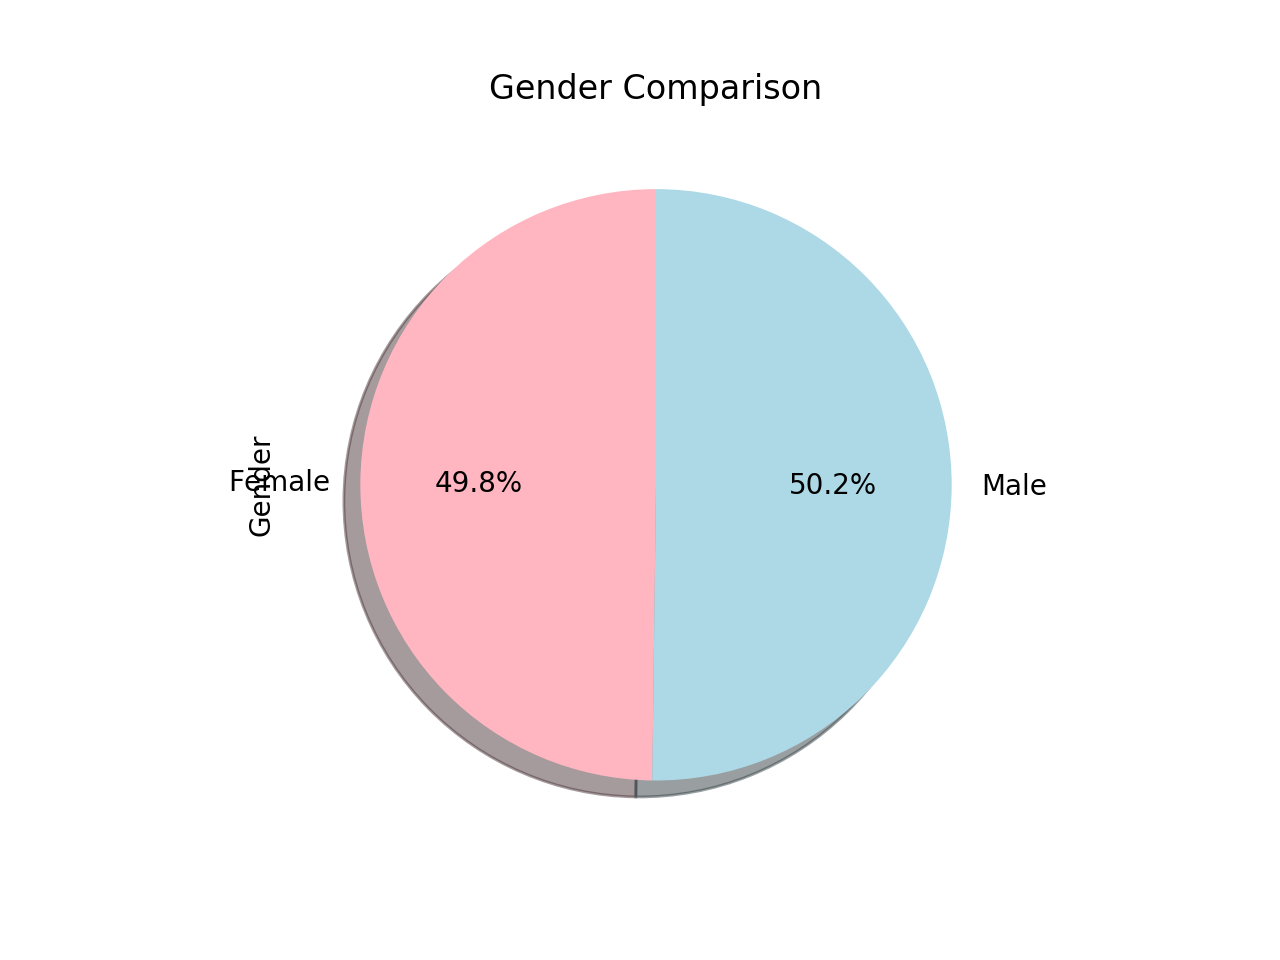

/Users/matthewvicario/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


In [11]:
# Generate a pie plot showing the distribution of female versus male mice 
# using pandas & pyplot
mouse_gender = mouse_metadata.groupby(["Sex"]).nunique()
#mouse_gender
sizes = [mouse_gender["Mouse ID"]]
#sizes
labels = ["Female", "Male"]
colors = ["lightpink", "lightblue"]

plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 90)

plt.title('Gender Comparison')
plt.ylabel('Gender')

plt.show()

In [12]:
plt.clf()
plt.cla()
plt.close()

<IPython.core.display.Javascript object>


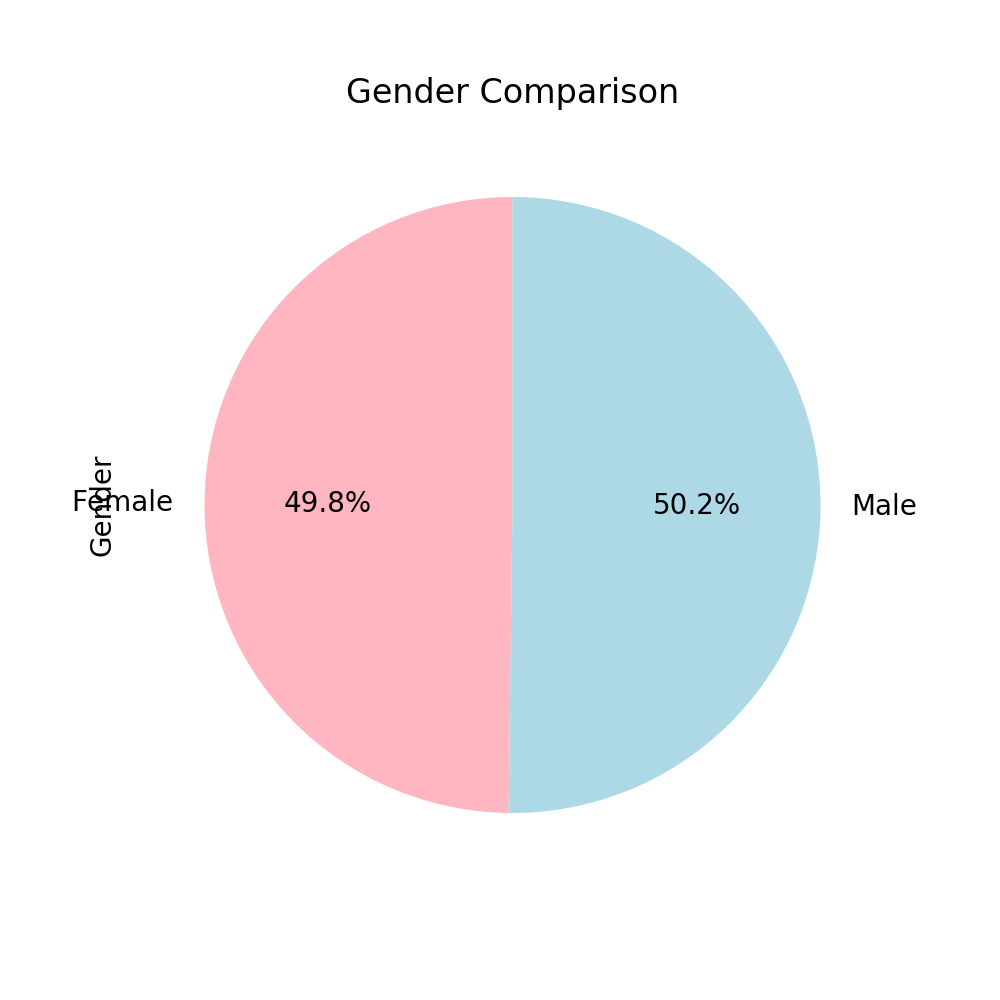

In [13]:
pandaspie = mouse_gender["Mouse ID"].plot.pie(y='sizes', figsize=(5, 5), colors=["lightpink", "lightblue"], autopct="%1.1f%%",startangle=90)

plt.title('Male vs Female Mouse Population')
plt.title('Gender Comparison')
plt.ylabel('Gender')

plt.show()

In [14]:
plt.clf()
plt.cla()
plt.close()

Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

tp_mouse_sorted = new_mouse_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

capomulin = tp_mouse_sorted.loc[tp_mouse_sorted["Drug Regimen"] == "Capomulin",:]
ramicane = tp_mouse_sorted.loc[tp_mouse_sorted["Drug Regimen"] == "Ramicane",:]
infubinol = tp_mouse_sorted.loc[tp_mouse_sorted["Drug Regimen"] == "Infubinol",:]
ceftamin = tp_mouse_sorted.loc[tp_mouse_sorted["Drug Regimen"] == "Ceftamin",:]


In [16]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_tp = capomulin.groupby("Mouse ID").max()["Timepoint"]
cap_final_vol = pd.DataFrame(cap_tp)
cap_merge = pd.merge(cap_final_vol, tp_mouse_sorted, on=("Mouse ID", "Timepoint"), how ="left")
cap_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_tumor_vol = cap_merge["Tumor Volume (mm3)"]

quartiles = cap_tumor_vol.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of the Capomulin Tumor Volume data is {lowerq}")
print(f"The upper quartile of the Capomulin Tumor Volume data is {upperq}")
print(f"The interquartile range of the Capomulin Tumor Volume data is {iqr}")
print(f"The median of the Capomulin Tumor Volume data is {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} and above {upper_bound} could be outliers")

The lower quartile of the Capomulin Tumor Volume data is 32.37735684
The upper quartile of the Capomulin Tumor Volume data is 40.1592203
The interquartile range of the Capomulin Tumor Volume data is 7.781863460000004
The median of the Capomulin Tumor Volume data is 38.125164399999996
Values below 20.70456164999999 and above 51.83201549 could be outliers


In [18]:
ram_tp = ramicane.groupby("Mouse ID").max()["Timepoint"]
ram_final_vol = pd.DataFrame(ram_tp)
ram_merge = pd.merge(ram_final_vol, tp_mouse_sorted, on=("Mouse ID", "Timepoint"), how ="left")
ram_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [19]:
ram_tumor_vol = ram_merge["Tumor Volume (mm3)"]

quartiles = ram_tumor_vol.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of the Ramicane Tumor Volume data is {lowerq}")
print(f"The upper quartile of the Ramicane Tumor Volume data is {upperq}")
print(f"The interquartile range of the Ramicane Tumor Volume data is {iqr}")
print(f"The median of the Ramicane Tumor Volume data is {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} and above {upper_bound} could be outliers")

The lower quartile of the Ramicane Tumor Volume data is 31.56046955
The upper quartile of the Ramicane Tumor Volume data is 40.65900627
The interquartile range of the Ramicane Tumor Volume data is 9.098536719999998
The median of the Ramicane Tumor Volume data is 36.56165229
Values below 17.912664470000003 and above 54.30681135 could be outliers


In [20]:
inf_tp = infubinol.groupby("Mouse ID").max()["Timepoint"]
inf_final_vol = pd.DataFrame(inf_tp)
inf_merge = pd.merge(inf_final_vol, tp_mouse_sorted, on=("Mouse ID", "Timepoint"), how ="left")
inf_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [21]:
inf_tumor_vol = inf_merge["Tumor Volume (mm3)"]

quartiles = inf_tumor_vol.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of the Infubinol Tumor Volume data is {lowerq}")
print(f"The upper quartile of the Infubinol Tumor Volume data is {upperq}")
print(f"The interquartile range of the Infubinol Tumor Volume data is {iqr}")
print(f"The median of the Infubinol Tumor Volume data is {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} and above {upper_bound} could be outliers")

The lower quartile of the Infubinol Tumor Volume data is 54.04860769
The upper quartile of the Infubinol Tumor Volume data is 65.52574285
The interquartile range of the Infubinol Tumor Volume data is 11.477135160000003
The median of the Infubinol Tumor Volume data is 60.16518046
Values below 36.83290494999999 and above 82.74144559000001 could be outliers


In [22]:
ceft_tp = ceftamin.groupby("Mouse ID").max()["Timepoint"]
ceft_final_vol = pd.DataFrame(ceft_tp)
ceft_merge = pd.merge(ceft_final_vol, tp_mouse_sorted, on=("Mouse ID", "Timepoint"), how ="left")
ceft_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [23]:
ceft_tumor_vol = ceft_merge["Tumor Volume (mm3)"]

quartiles = ceft_tumor_vol.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of the Ceftamin Tumor Volume data is {lowerq}")
print(f"The upper quartile of the Ceftamin Tumor Volume data is {upperq}")
print(f"The interquartile range of the Ceftamin Tumor Volume data is {iqr}")
print(f"The median of the Ceftamin Tumor Volume data is {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} and above {upper_bound} could be outliers")

The lower quartile of the Ceftamin Tumor Volume data is 48.72207785
The upper quartile of the Ceftamin Tumor Volume data is 64.29983003
The interquartile range of the Ceftamin Tumor Volume data is 15.577752179999997
The median of the Ceftamin Tumor Volume data is 59.85195552
Values below 25.355449580000002 and above 87.66645829999999 could be outliers


<IPython.core.display.Javascript object>


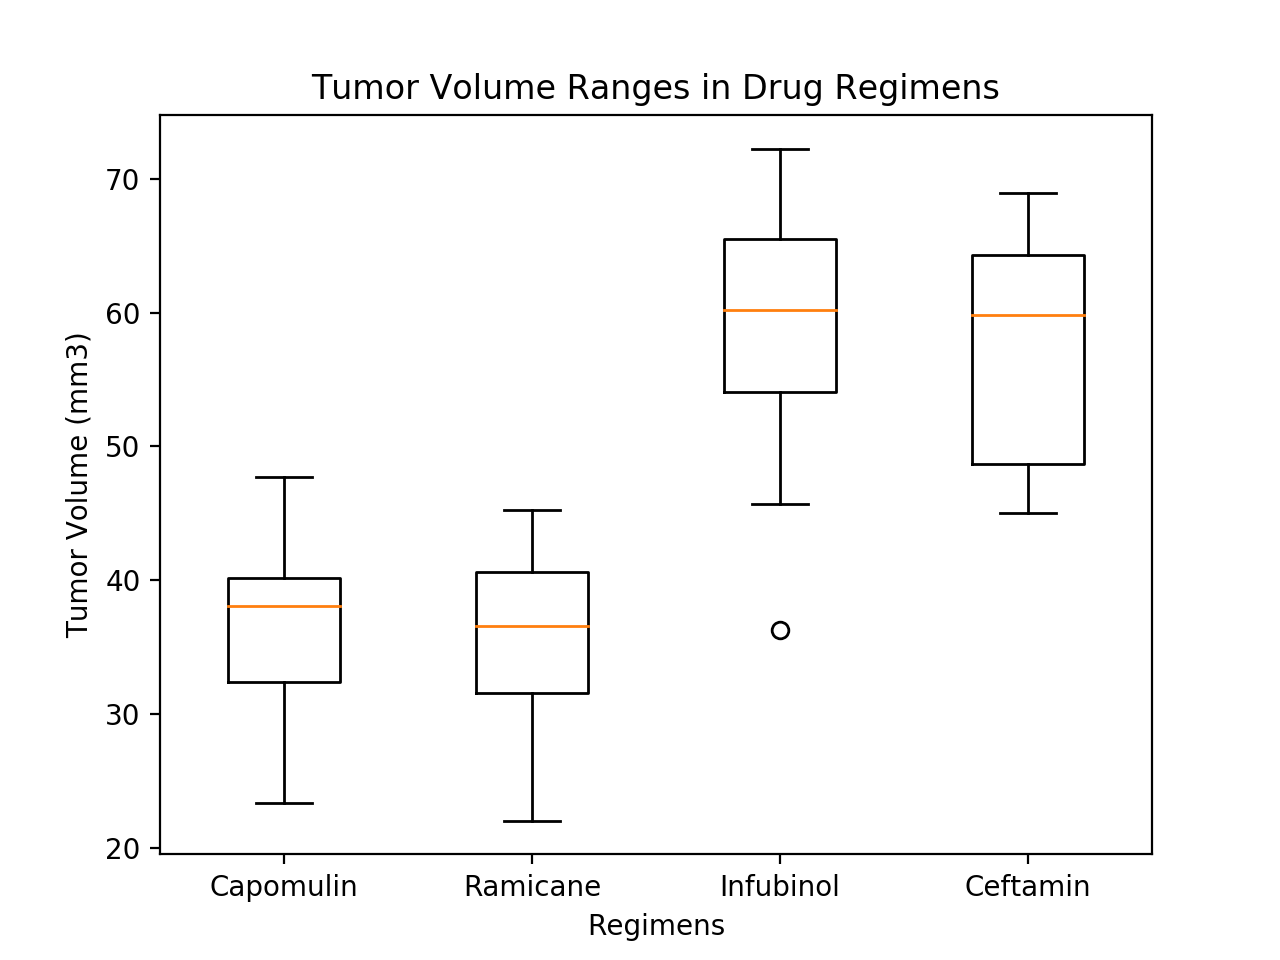

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plots = [cap_tumor_vol, ram_tumor_vol, inf_tumor_vol, ceft_tumor_vol]

fig1,ax1 = plt.subplots()
ax1.set_title('Tumor Volume Ranges in Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel("Regimens")
ax1.boxplot(box_plots, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

 Line and Scatter Plots

In [25]:
plt.clf()
plt.cla()
plt.close()

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
select_mouse_df = capomulin.loc[capomulin["Mouse ID"] == "g288"]
select_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
235,g288,Capomulin,Male,3,19,0,45.000000,0
236,g288,Capomulin,Male,3,19,5,45.839400,0
237,g288,Capomulin,Male,3,19,10,46.304003,1
238,g288,Capomulin,Male,3,19,15,42.172301,1
239,g288,Capomulin,Male,3,19,20,42.957120,1
240,g288,Capomulin,Male,3,19,25,42.368692,1
241,g288,Capomulin,Male,3,19,30,42.874461,1
242,g288,Capomulin,Male,3,19,35,38.954115,1
243,g288,Capomulin,Male,3,19,40,36.356851,1
244,g288,Capomulin,Male,3,19,45,37.074024,1


<IPython.core.display.Javascript object>


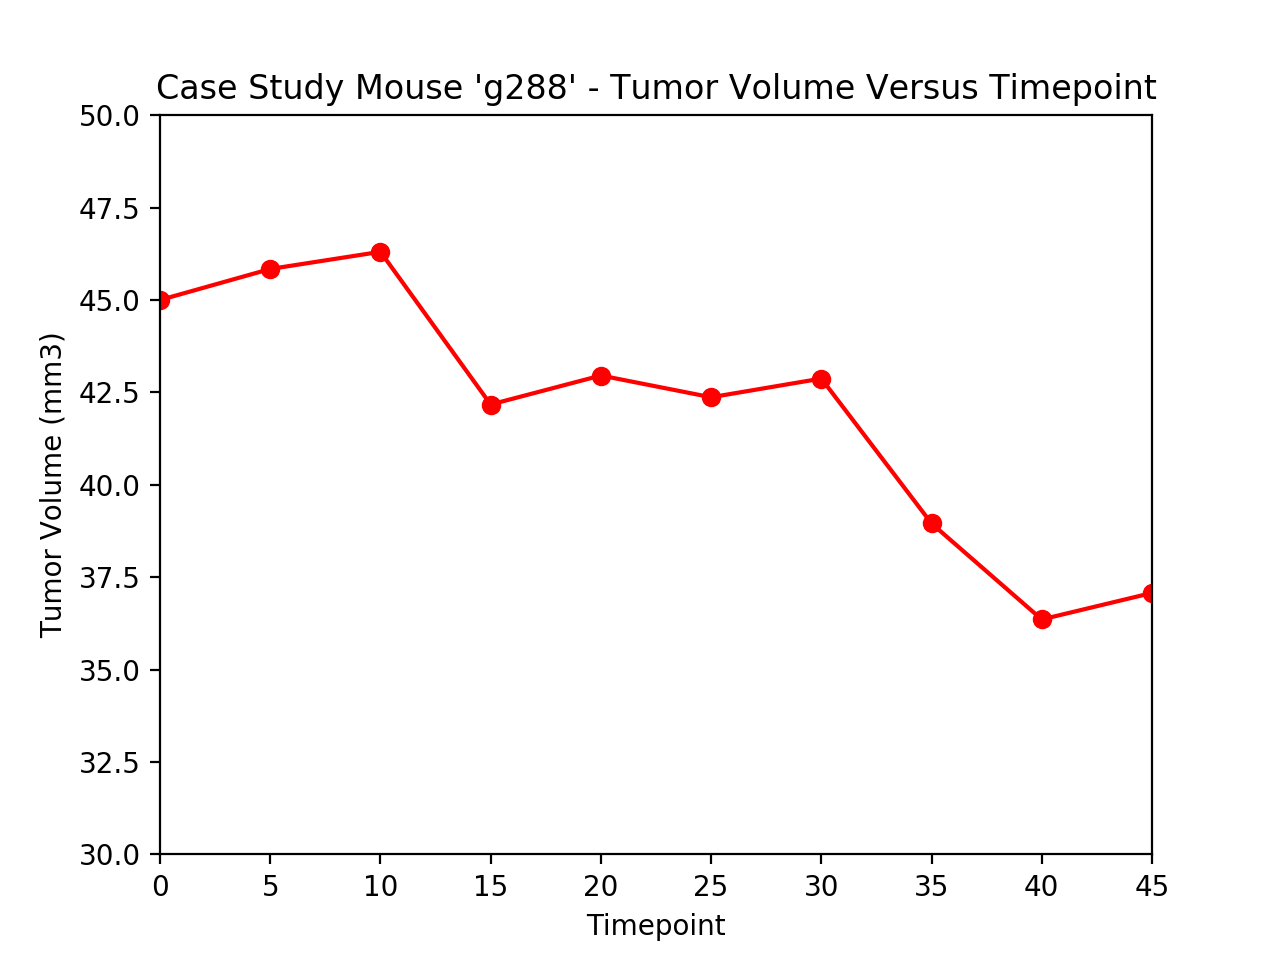

In [28]:
x_axis = select_mouse_df["Timepoint"]
y_axis = select_mouse_df["Tumor Volume (mm3)"]

plt.title("Case Study Mouse 'g288' - Tumor Volume Versus Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(x_axis, y_axis, marker = 'o', color = 'r')

plt.xlim(0,45)
plt.ylim(30,50)

plt.show()

<IPython.core.display.Javascript object>


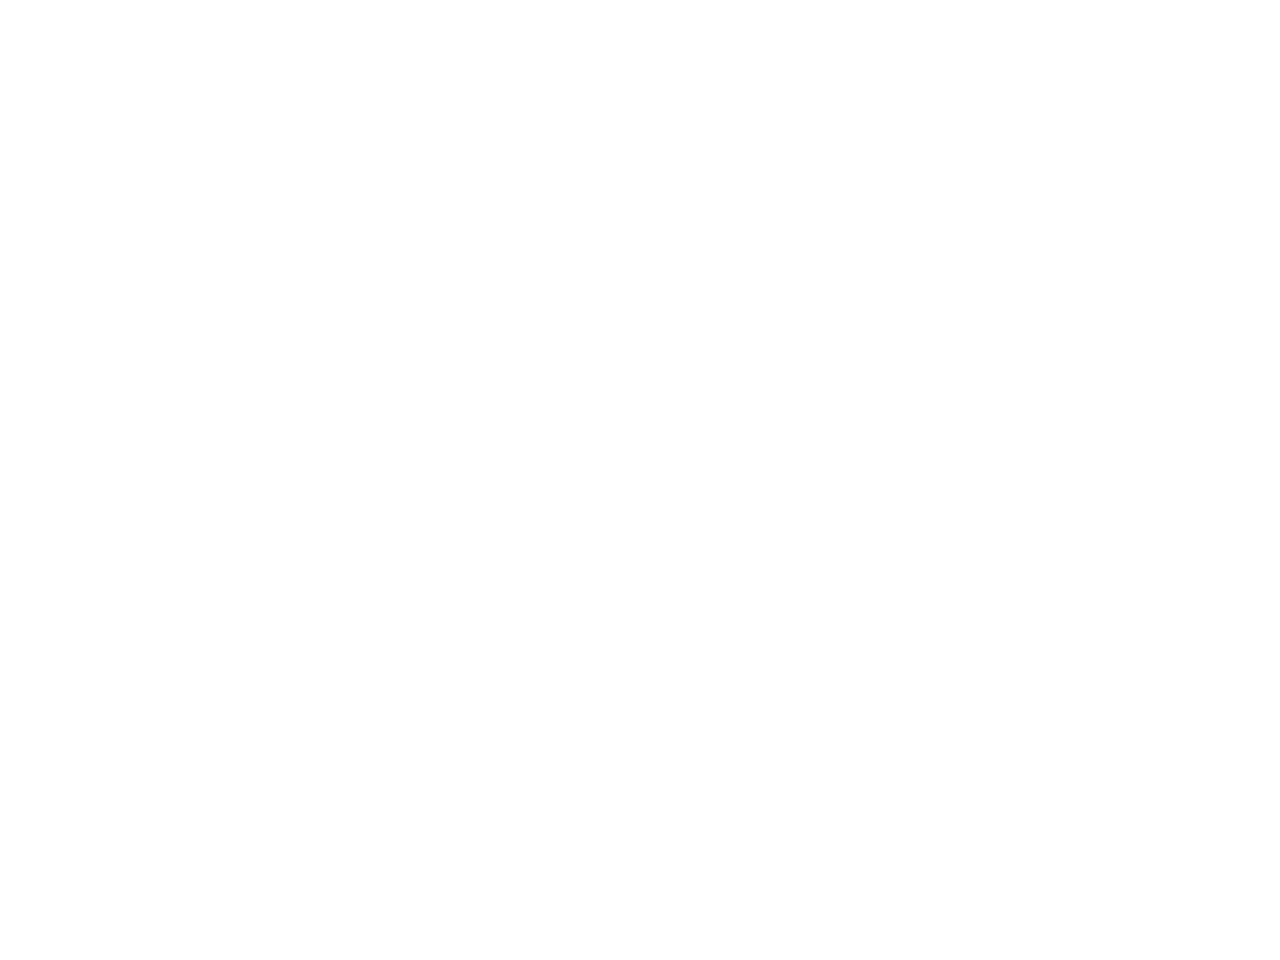

In [34]:
plt.clf()
plt.cla()
plt.close()

In [35]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_ave = capomulin.groupby(["Mouse ID"]).mean()
mouse_ave.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [36]:
plt.scatter(mouse_ave["Weight (g)"], mouse_ave["Tumor Volume (mm3)"])

plt.title("Capomulin Regimen - Mice Weight Versus Average Tumor Volume)
plt.xlabel("Weight")
plt.ylabel("Ave Tumor Volume (mm3)")
          
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-36-9d6874b1804e>, line 3)